# Experiment Type 1

$$
\begin{align}
f(X) & = A \cdot X + b; \\ 
m & \ge 1; \\
s & \ge 0; \\
Z & = N(0, \sigma^2)
\end{align}
$$

This is a simple class of experiments that linear regression should be
very good at. $F$ is a linear function of $X$, there are one or more
features, zero or more confounding features, and normally distributed
noise.

In [1]:
import impactstudy.experiment as ise
from impactchart.model import XGBoostImpactModel
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Configuration

In [2]:
N = 250

In [3]:
M = 4

## A Single Scenario For Manual Verification.

### Set Up the Scenario

In [4]:
experiment0 = ise.LinearWithNoiseExperiment(m=M, s=0, sigma=25.0)

### Generate Impact Charts

In [5]:
tags, scenario = next(experiment0.scenarios())

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


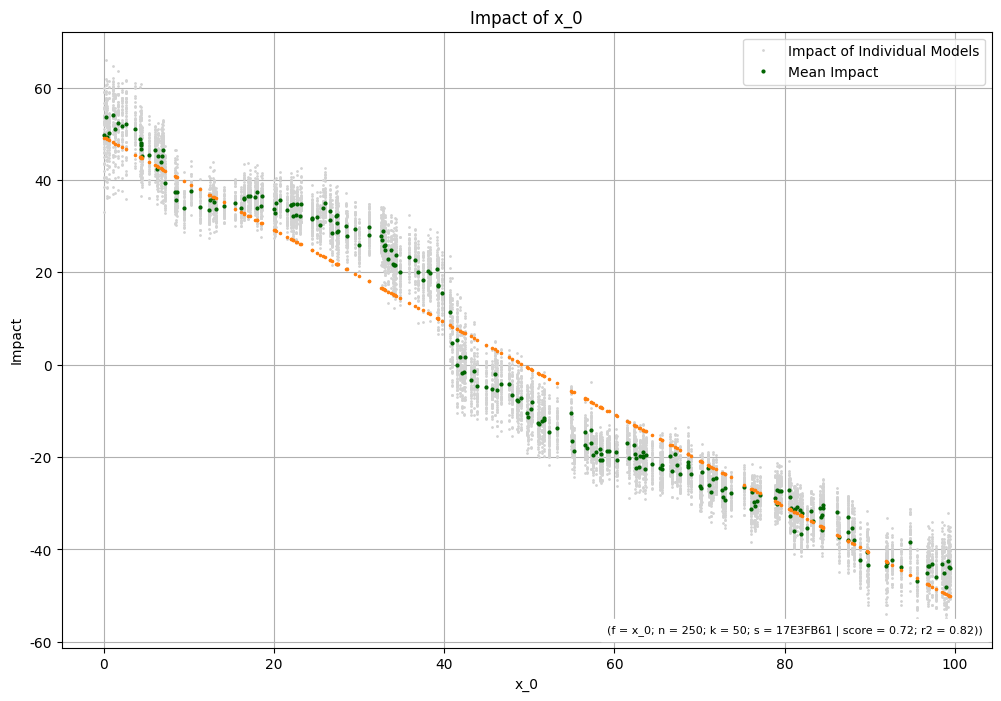

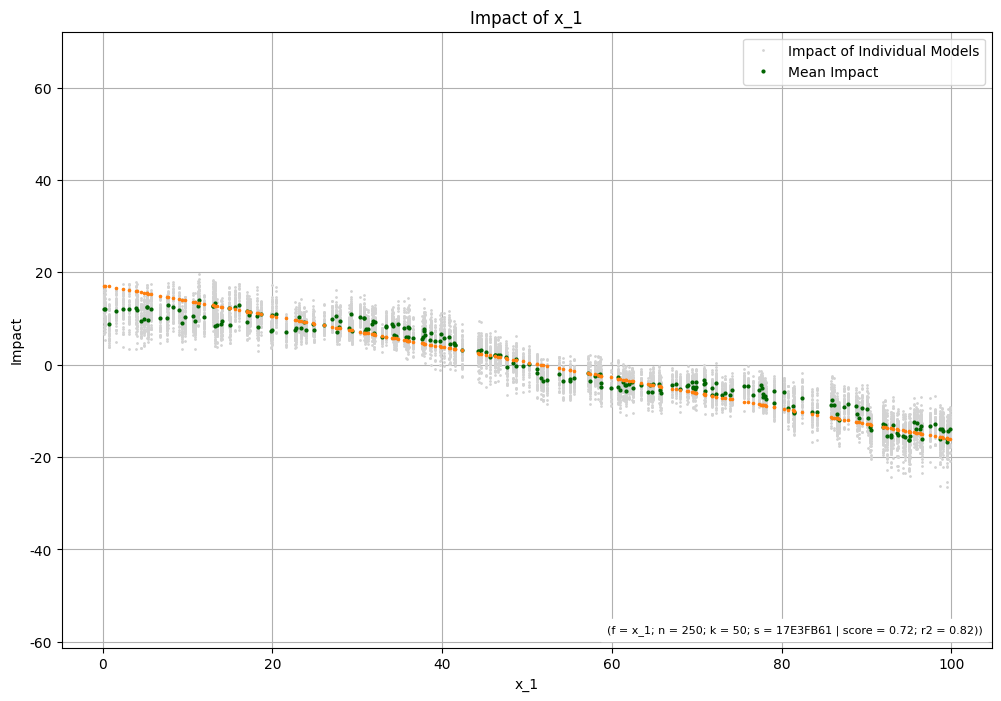

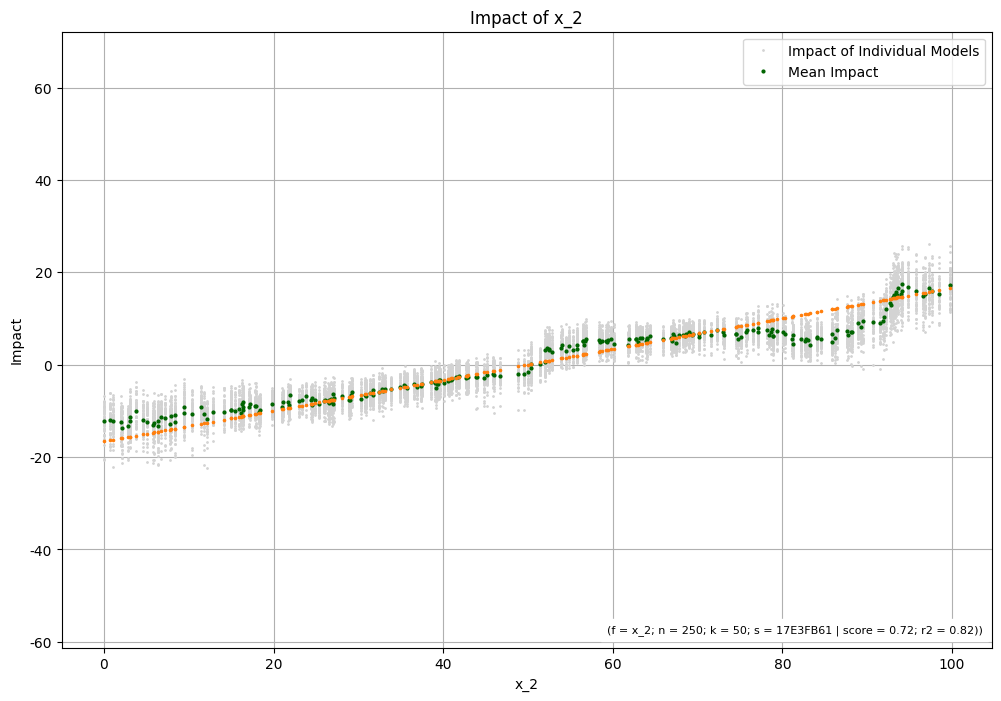

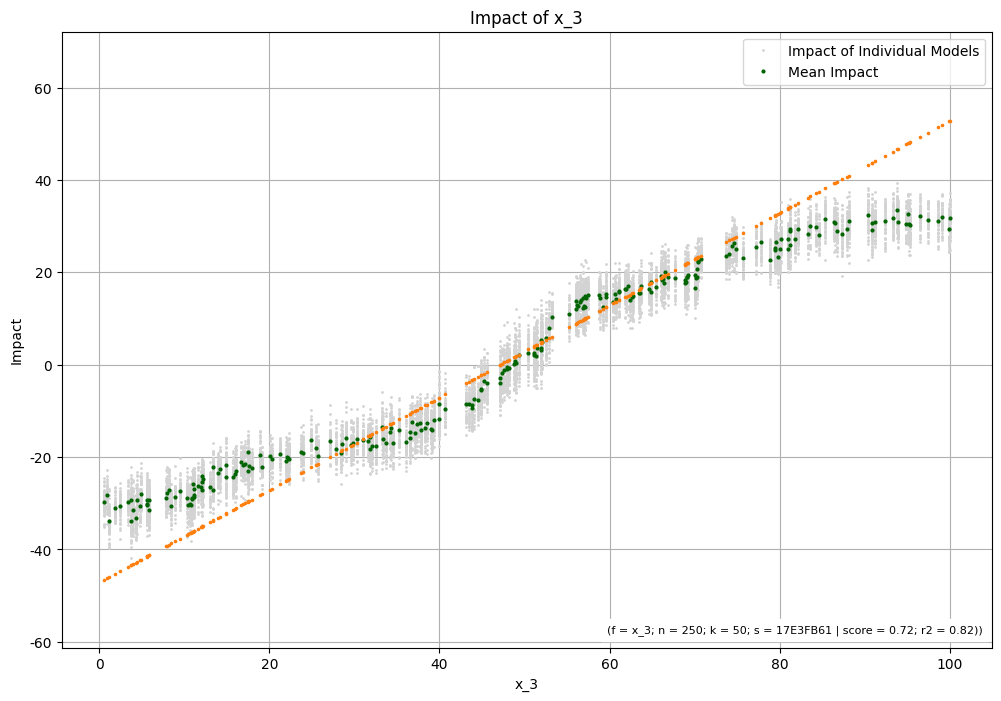

In [6]:
impact_charts = scenario.model_impact_charts(N)

### Generate Metrics

In [7]:
scenario.model_errors(N)

,metric,x_0,x_1,x_2,x_3
0,RMSE,6.321373,2.239294,2.362642,7.607726
0,MAE,5.420841,1.757111,1.724500,5.914691
0,MED_AE,5.385178,1.412527,1.292144,4.661561


## A Multi-Scenario Experiment

In [8]:
experiment = ise.LinearWithNoiseExperiment(m=M, s=0, sigma=np.arange(0.0, 51.0, 10.0))

In [9]:
df_model_errors = experiment.model_errors(N)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Fitting 5 folds for each of 200 candidates, totalling 1000 fits


In [10]:
df_model_errors

,metric,x_0,x_1,x_2,x_3,m,s,sigma,mu_x_i
0,RMSE,2.352969,1.770165,1.933475,2.191364,4,0,0.0,2.061993
0,MAE,1.812758,1.442692,1.535059,1.669564,4,0,0.0,1.615018
0,MED_AE,1.464109,1.203187,1.233845,1.306389,4,0,0.0,1.301882
0,RMSE,3.704731,1.707873,1.765209,4.085183,4,0,10.0,2.815749
0,MAE,3.089677,1.391957,1.327723,3.134022,4,0,10.0,2.235845
0,MED_AE,2.834246,1.270733,0.944617,2.435338,4,0,10.0,1.871234
0,RMSE,5.576162,2.152630,2.192297,6.831017,4,0,20.0,4.188027
0,MAE,4.769715,1.637815,1.632532,5.213466,4,0,20.0,3.313382
0,MED_AE,4.838036,1.273163,1.233865,4.144531,4,0,20.0,2.872399
0,RMSE,7.151349,2.479101,2.697967,8.520483,4,0,30.0,5.212225


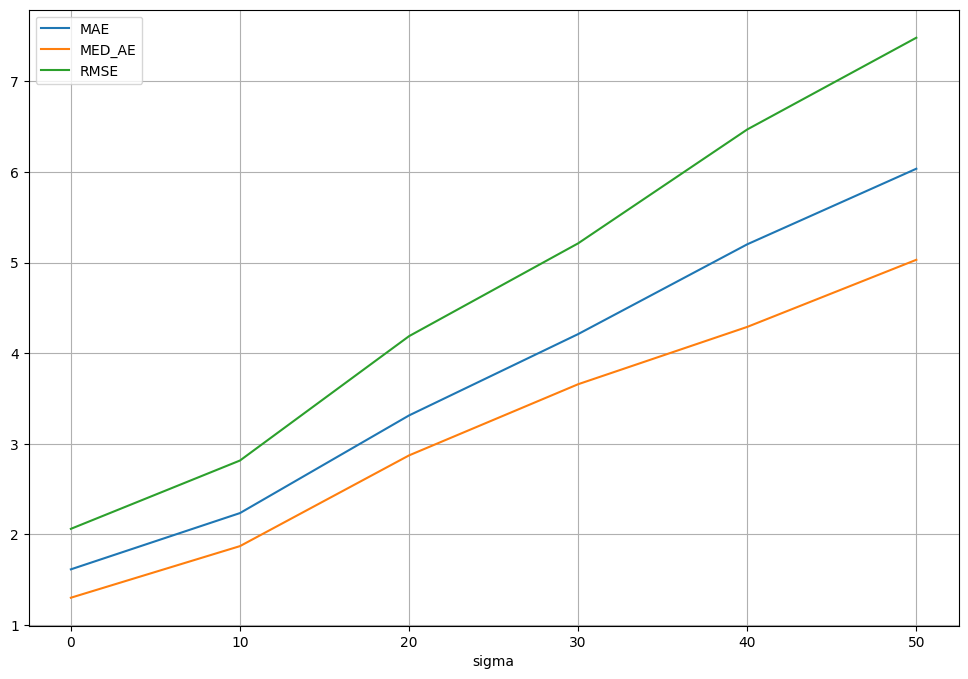

In [11]:
ax = None

for name, df_group in df_model_errors.groupby("metric"):
    ax = df_group.plot("sigma", "mu_x_i", ax=ax, label=name, figsize=(12, 8))

ax.grid()